### Face Detection from image

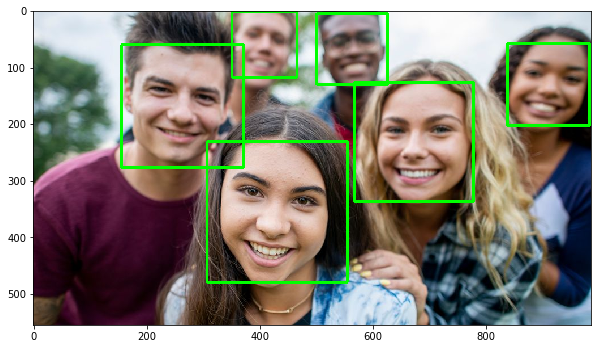

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Open the image
img = cv2.imread('../Images/peoples-1.jpg')

'''
Many methods in cv2 expects grayscale image. 
If you don't convert to grayscale, cv2 will do it for you.
If you use multiple methods that expects grayscale image, 
    then converting to grayscale before passing might be save some time. 
    As all of these methods won't need to convert to grayscale.
'''
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the cascade
face_cascade = cv2.CascadeClassifier('../Haarcascades/haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img=img, pt1=(x, y), pt2=(x+w, y+h), color=(0, 255, 0), thickness=3)

# Show the image in matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Eyes Detection from image

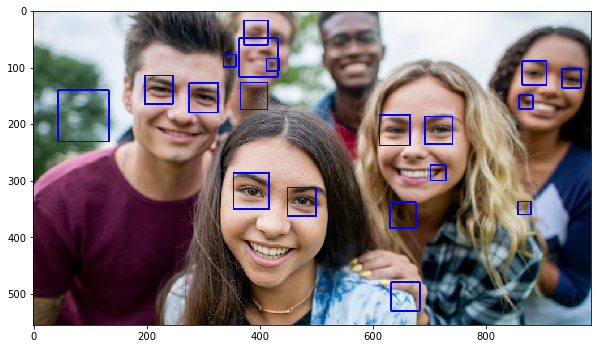

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
img = cv2.imread('../Images/peoples-1.jpg')

# Load the cascade
eye_cascade = cv2.CascadeClassifier('../Haarcascades/haarcascade_eye.xml')

# Detect eyes
eyes = eye_cascade.detectMultiScale(img)

for (x, y, w, h) in eyes:
    cv2.rectangle(img=img, pt1=(x, y), pt2=(x+w, y+h), color=(255, 0, 0), thickness=2)

# Show image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Face and Eyes Detection from image

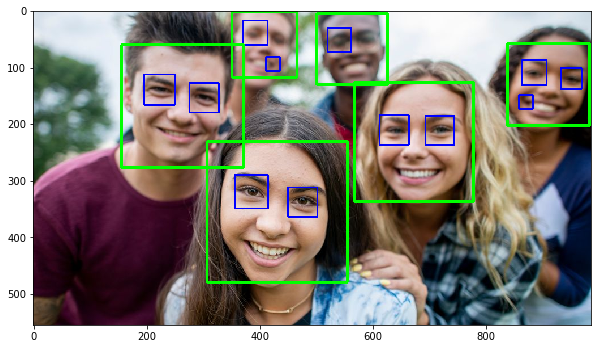

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
img = cv2.imread('../Images/peoples-1.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load cascades
face_cascade = cv2.CascadeClassifier('../Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../Haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img=img, pt1=(x, y), pt2=(x+w, y+h), color=(0, 255, 0), thickness=3)
    
    img_face =  img[y : y+h, x : x+w]
    gray_face =  gray[y : y+h, x : x+w]
    
    # Detect eyes in each faces
    eyes = eye_cascade.detectMultiScale(gray_face, 1.1, 6)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(img=img_face, pt1=(ex, ey), pt2=(ex+ew, ey+eh), color=(255, 0, 0), thickness=2)
    
# Show image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

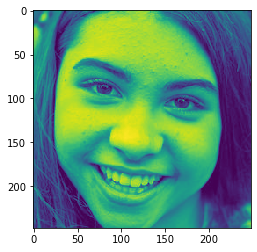

In [79]:
(x, y, w, h) = faces[2]
plt.imshow(gray[y : y+h, x : x+w])    # img shape -> (height, width, channels)

### Face and Eyes Detection from video

In [94]:
import numpy as np
import cv2

# Load cascades
face_cascade = cv2.CascadeClassifier('../Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../Haarcascades/haarcascade_eye.xml')

# Video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()    
    img = cv2.flip(img, 1)       # Mirror the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # Convert to grayscale

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img=img, pt1=(x, y), pt2=(x+w, y+h), color=(0, 255, 0), thickness=3)

        img_face =  img[y : y+h, x : x+w]
        gray_face =  gray[y : y+h, x : x+w]

        # Detect eyes in each faces
        eyes = eye_cascade.detectMultiScale(gray_face, 1.1, 5)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(img=img_face, pt1=(ex, ey), pt2=(ex+ew, ey+eh), color=(255, 0, 0), thickness=2)
    
    # Show the frame
    cv2.imshow('frame', img)
    
    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()